In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


# Data Preprocessing

In [3]:
# Drop kolom yang bersifat identifier dan memiliki  jumlah unique value hanya 1
df.drop(columns = ['ID', 'Sub Grade', 'Batch Enrolled', 
                   'Payment Plan', 'Application Type', 'Accounts Delinquent'], inplace=True)
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0


In [4]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Grade                    7
Employment Duration      3
Verification Status      3
Loan Title             109
Initial List Status      2
dtype: int64

In [5]:
# Drop 'Loan Title' column because the amount of unique value
df.drop(columns = 'Loan Title', inplace=True)
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0


# Exploratory Data Analysis

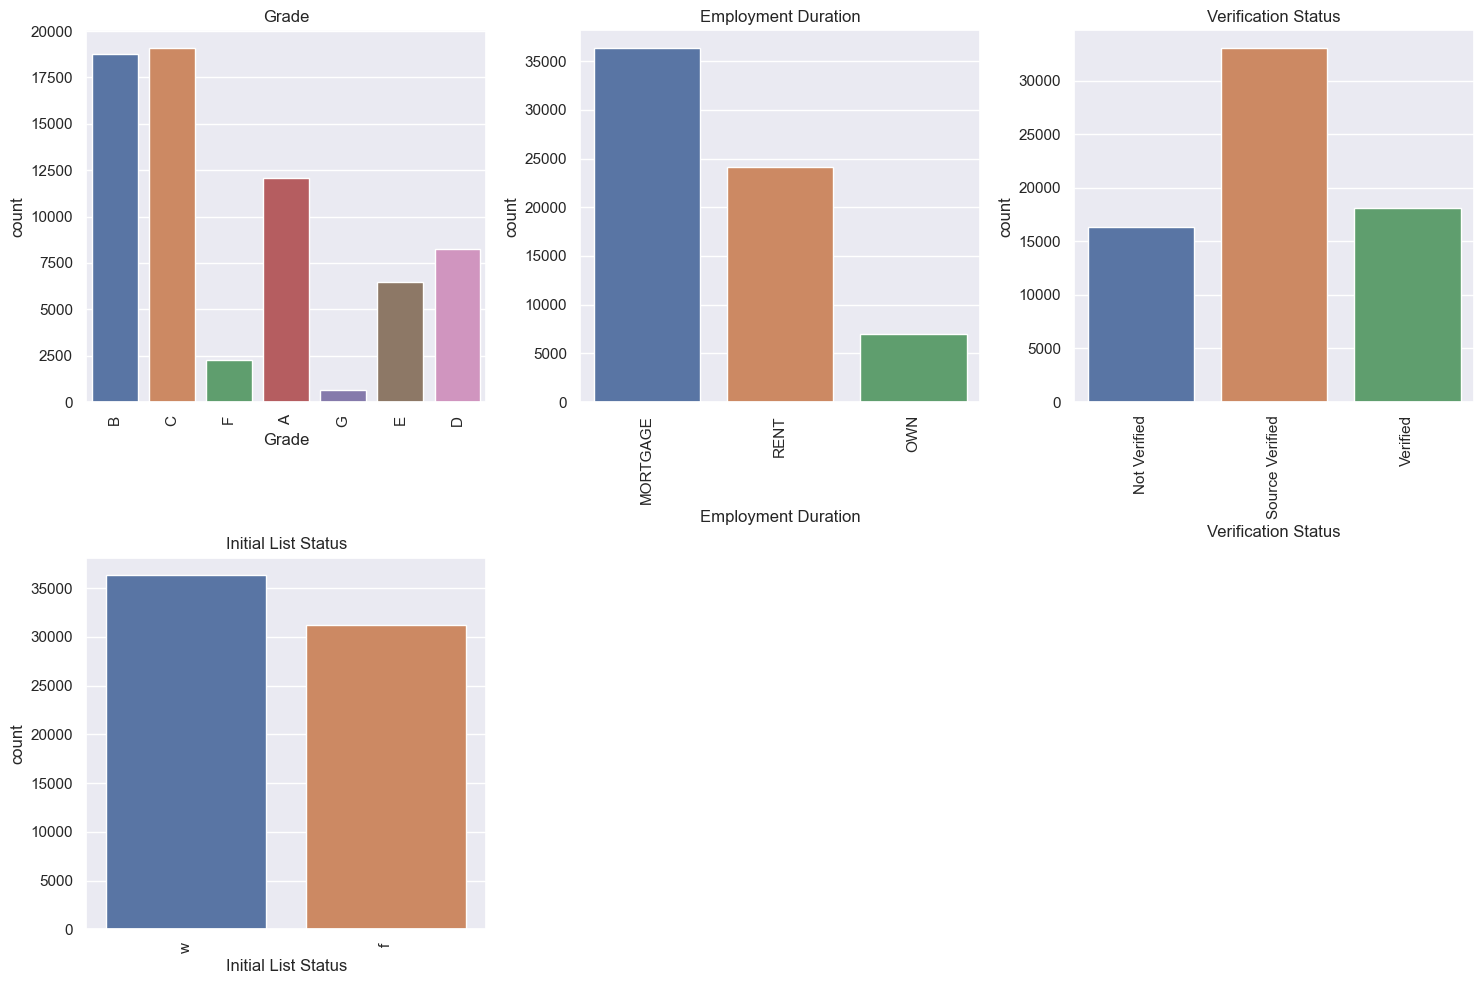

In [6]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

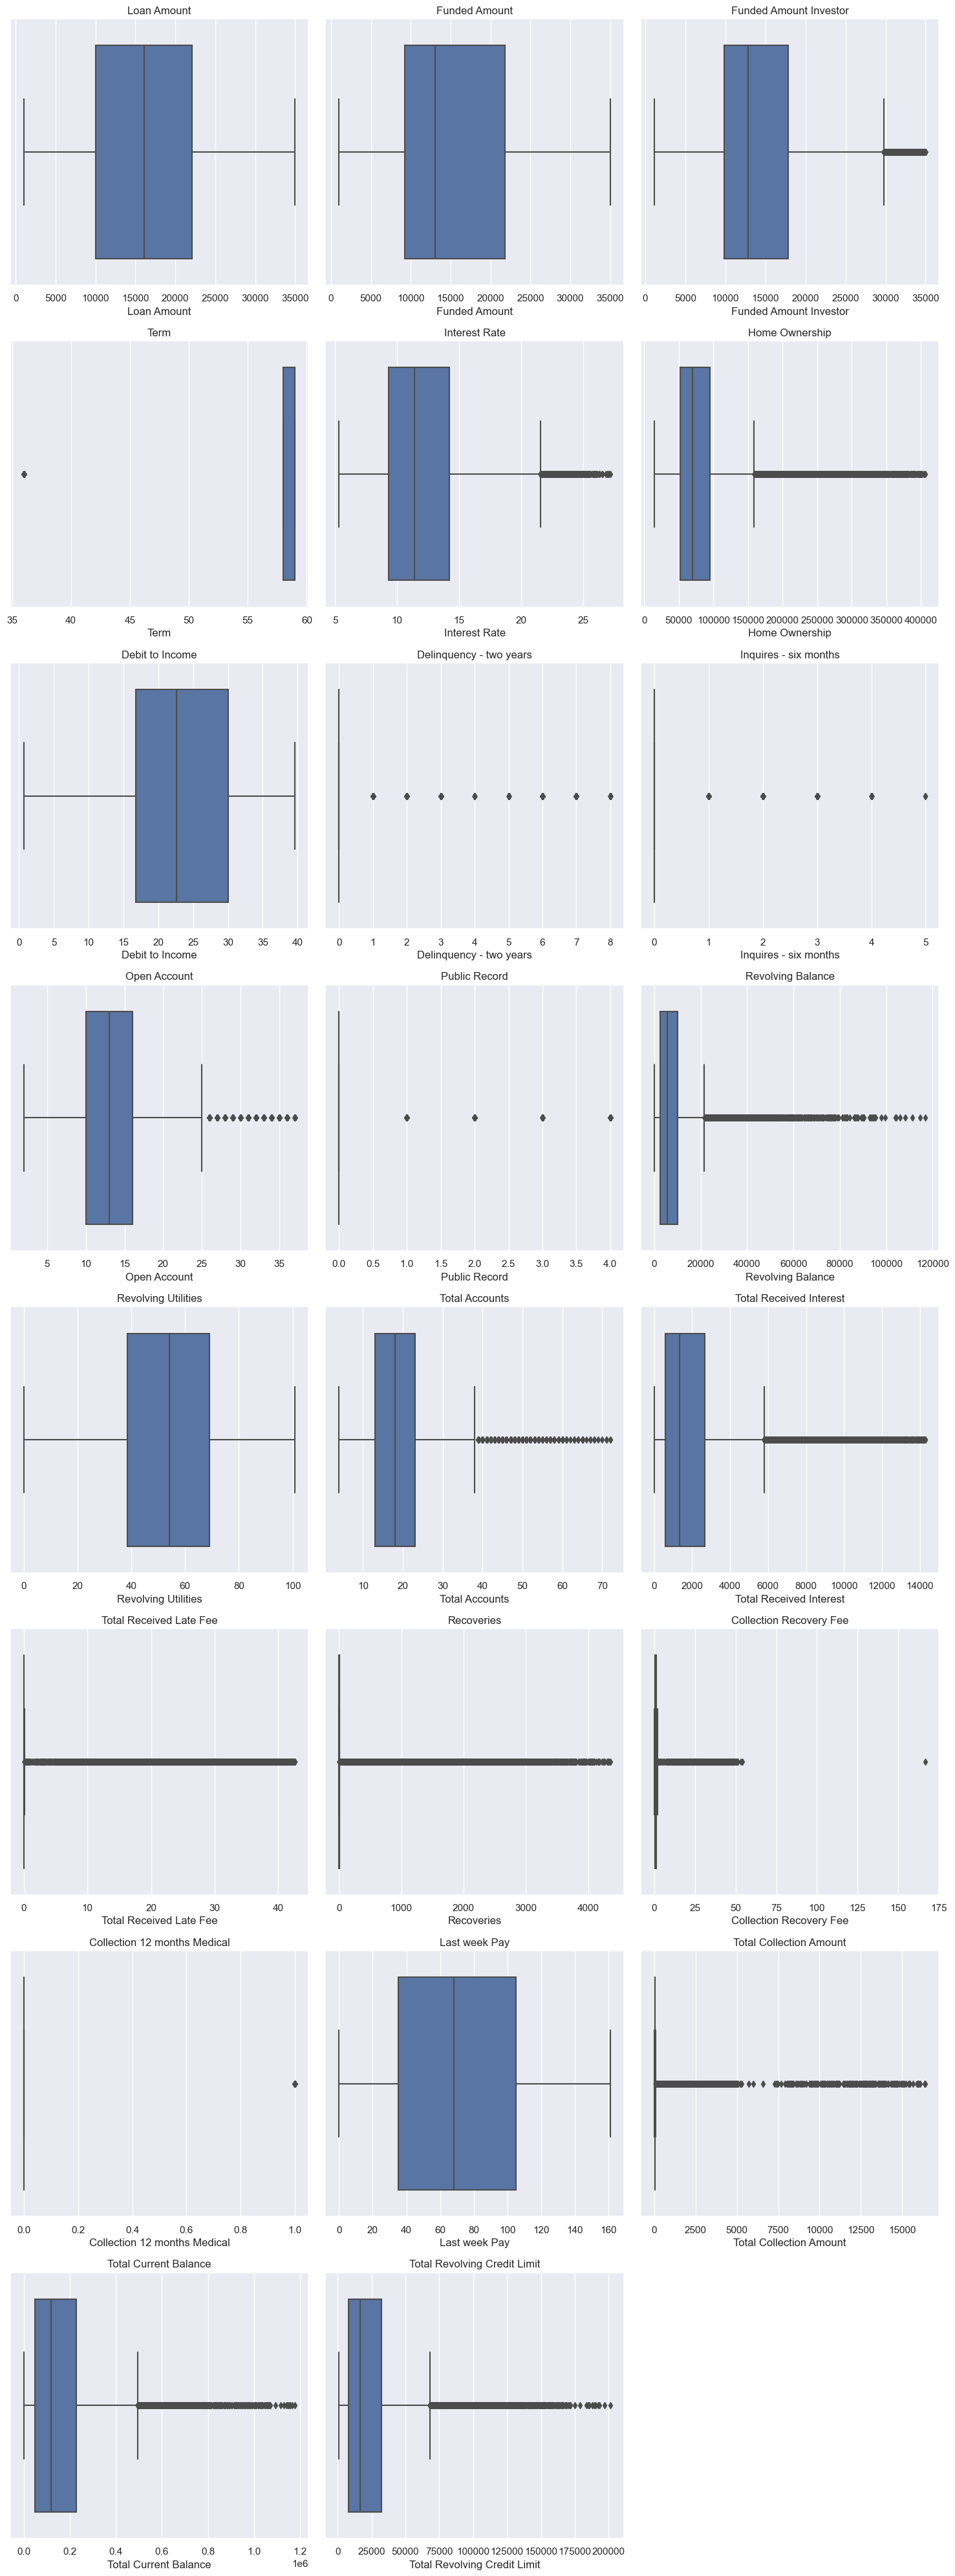

In [7]:
# Get the names of all columns with data type 'int' or 'float', excluding 'Loan Status'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('Loan Status')  # Remove the specific column

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

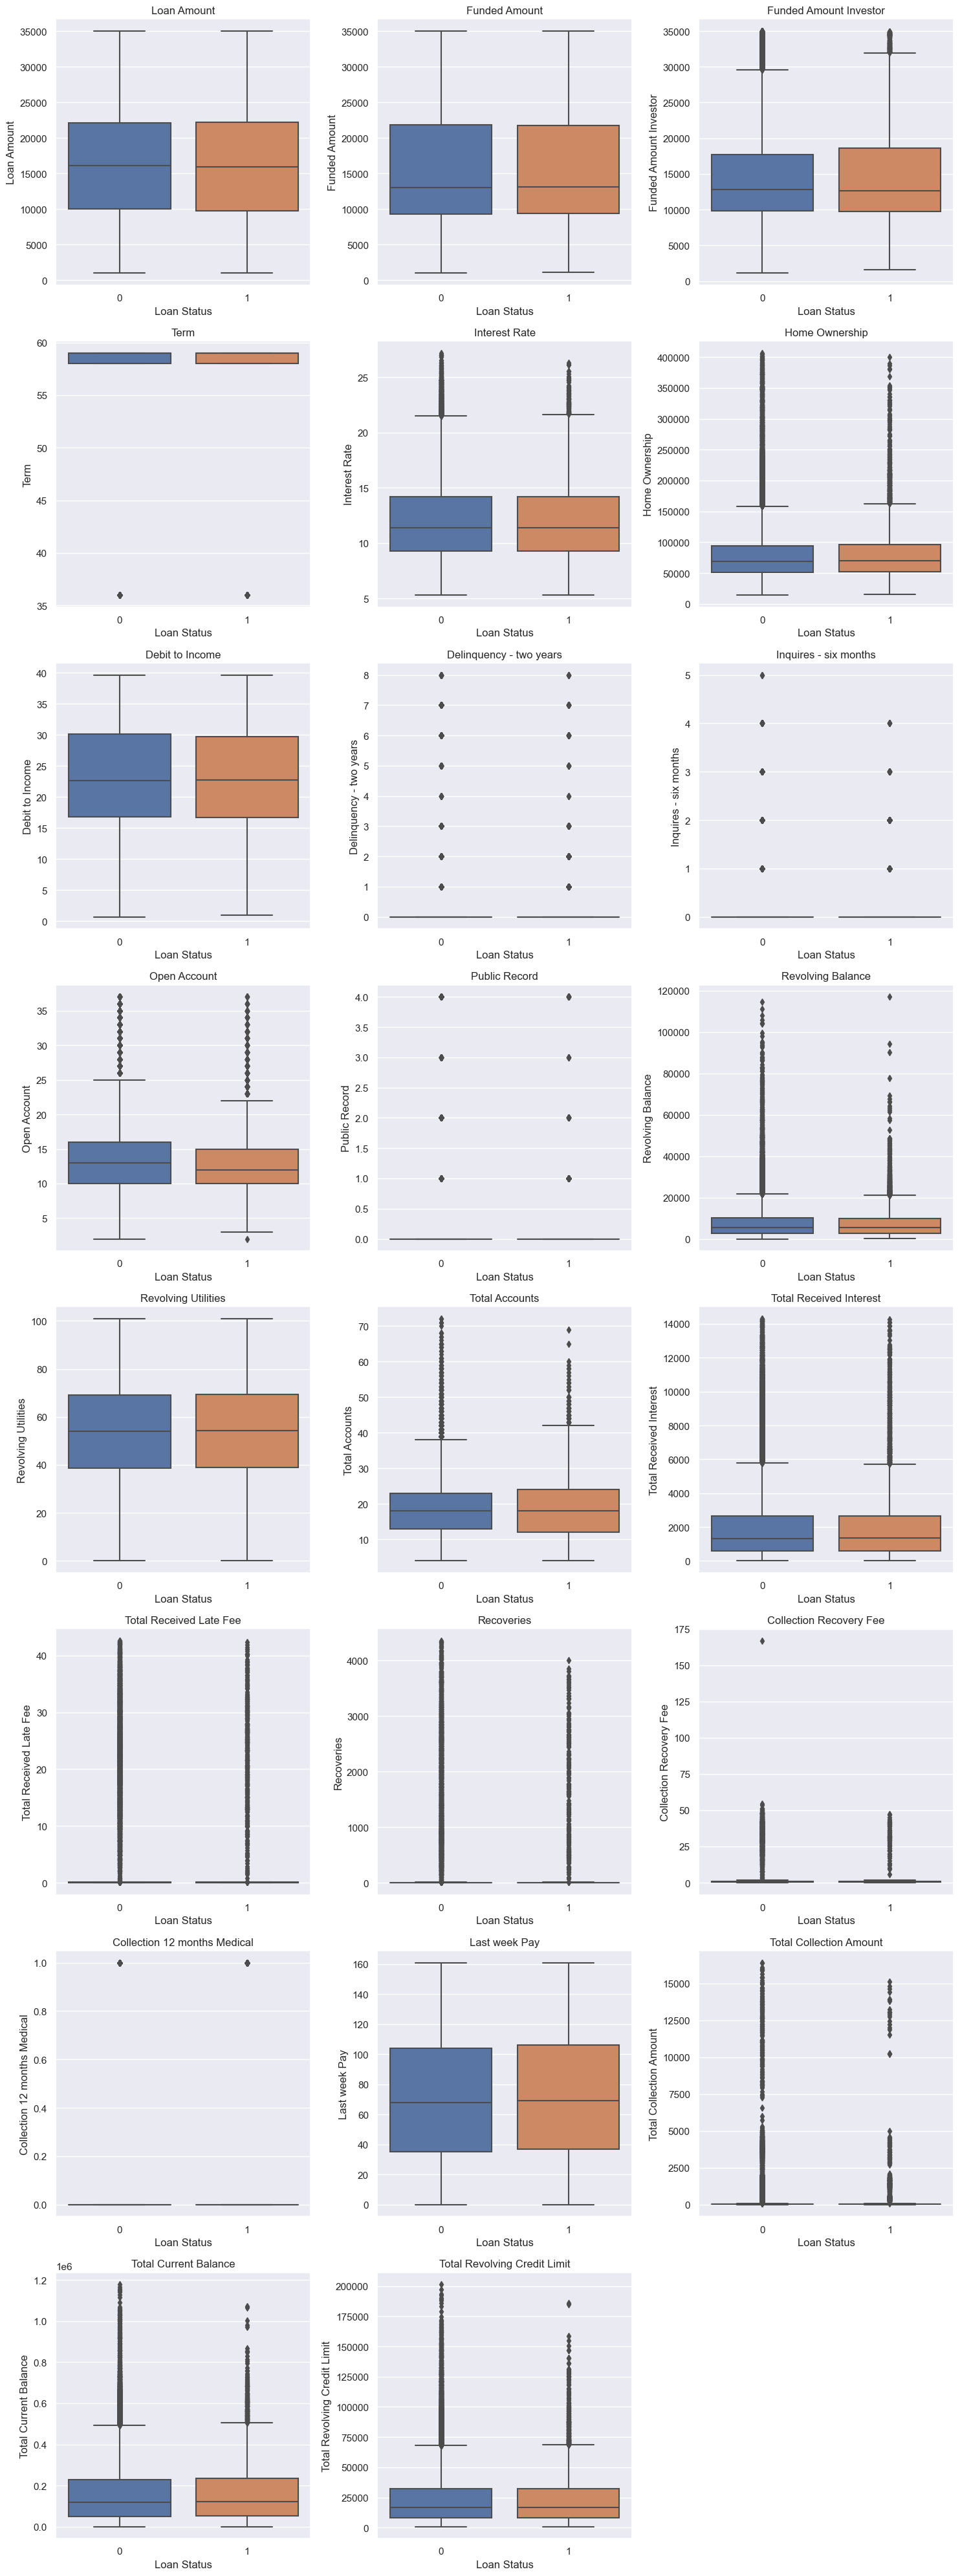

In [8]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
int_vars = [col for col in num_vars if col != 'Loan Status']

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Loan Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

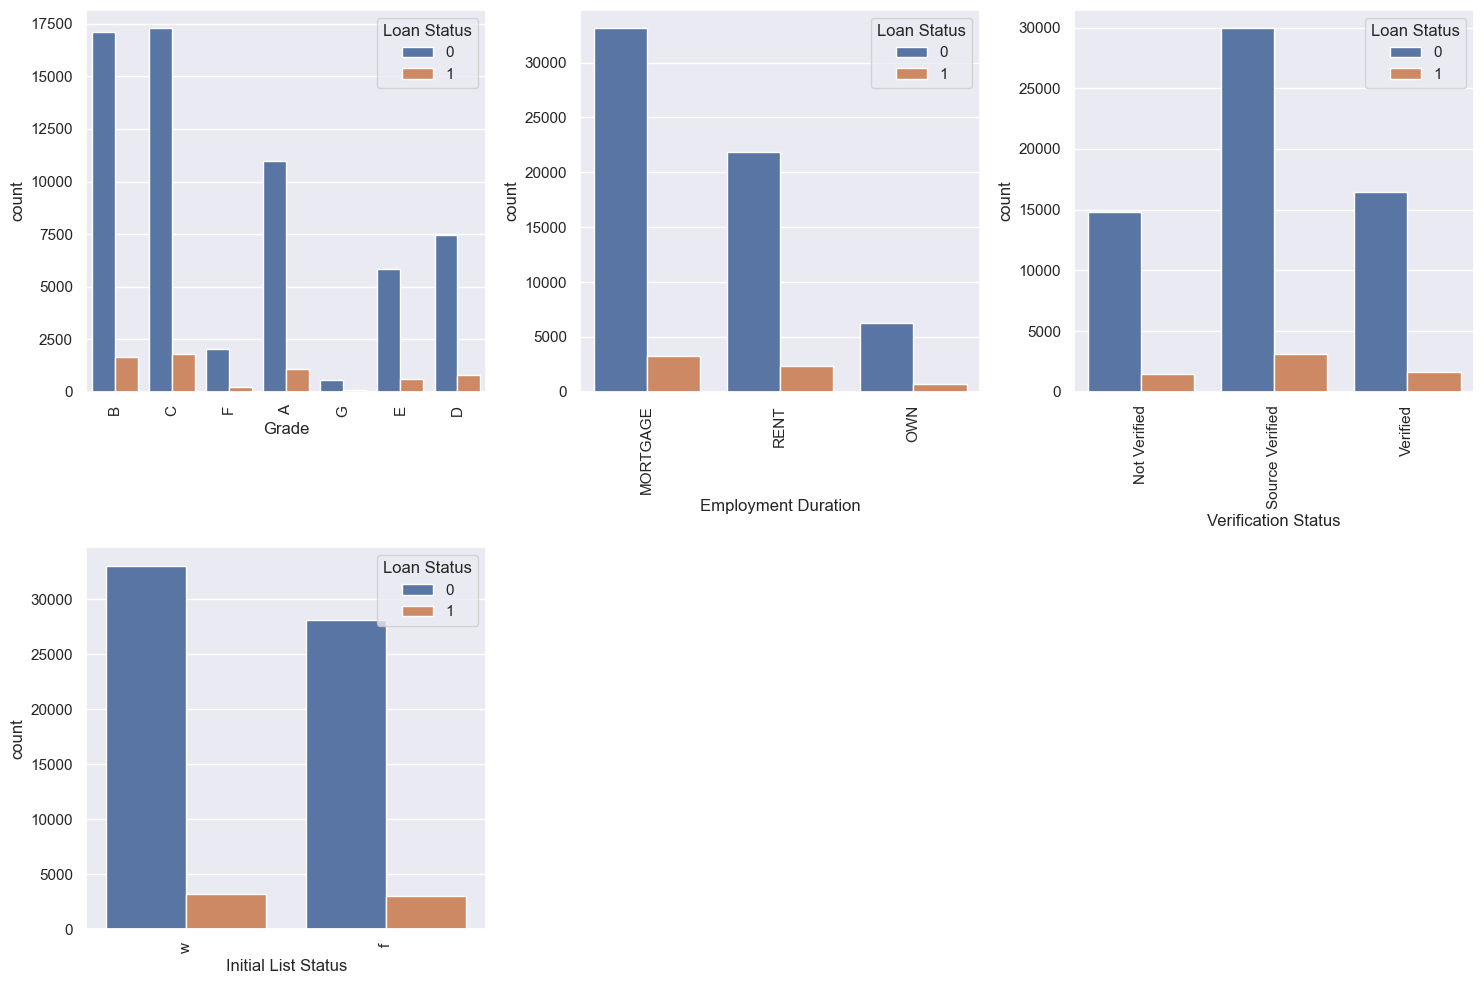

In [9]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' from the list if it exists in cat_vars
if 'Loan Status' in cat_vars:
    cat_vars.remove('Loan Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Loan Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

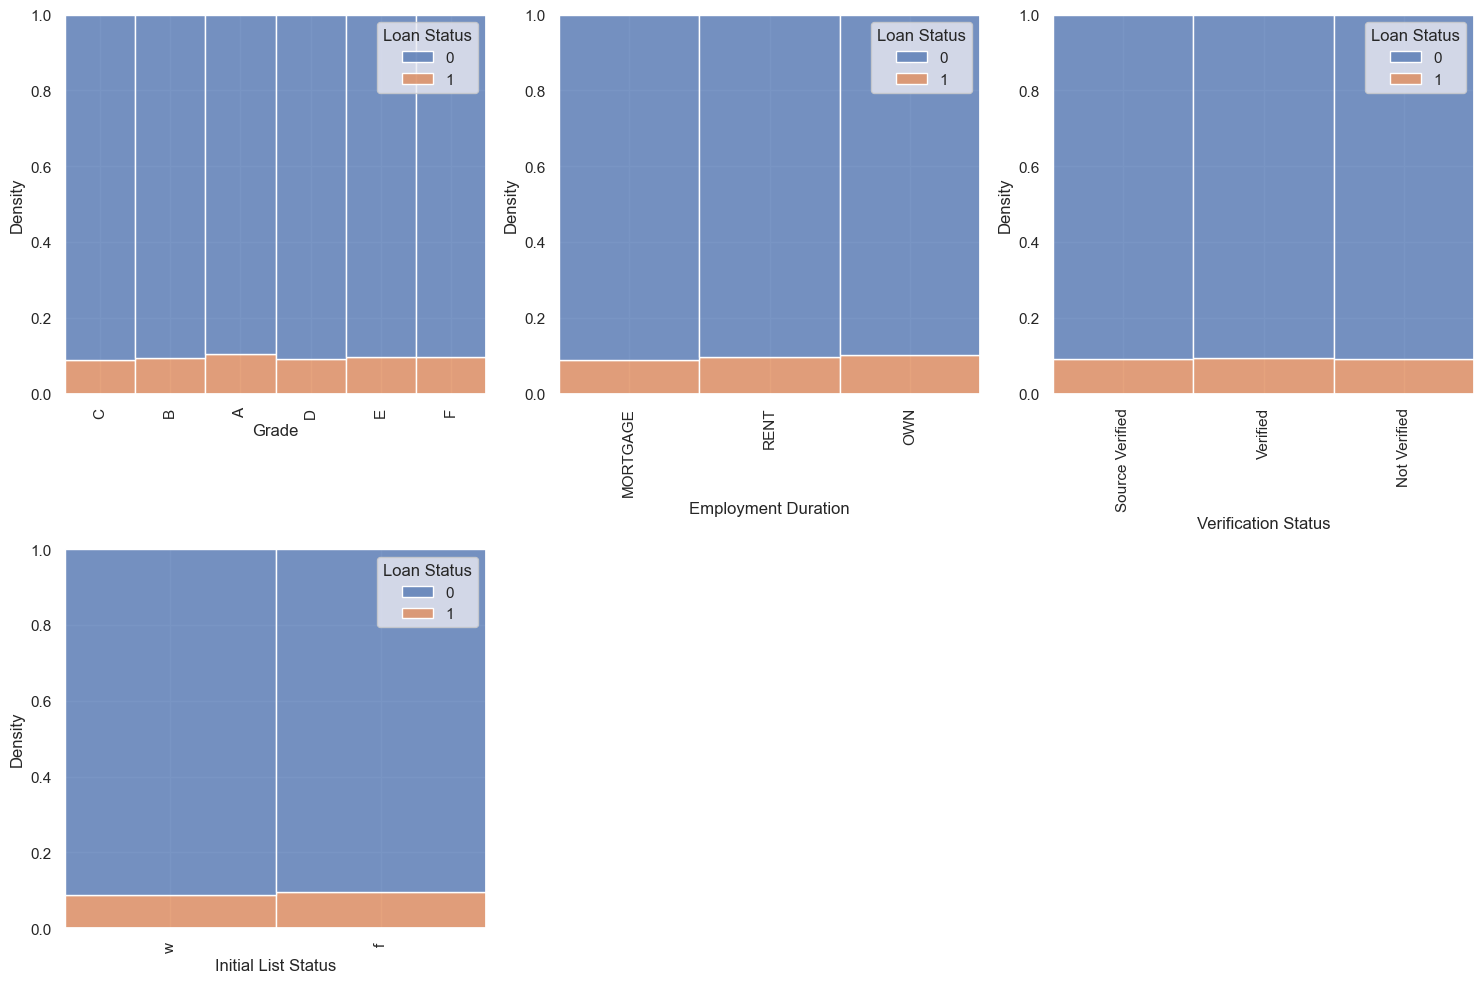

In [10]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan Status' in cat_vars:
    cat_vars.remove('Loan Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    
    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels
    
    sns.histplot(x=var, hue='Loan Status', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()